In [29]:
import matplotlib.font_manager as fm # 폰트를 임포트 시켜준다.
for i in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'nanum' in i.lower():
        print(i)
        
plt.rc('font', family = 'NanumGothic')

# 기초 통계

# 공분산과 상관계수

## 1. 표본공분산(Sample Covariance)

$${s_{xy}}=\frac{1}{N}\Sigma({x_i}-\hat{x})({y_i}-\hat{y})$$

## 표본상관계수(Sample Correlation Coefficient)

- 공분산에 각각의 표준편차 값으로 나눈 값
- 각각의 표준편차를 나눠 주는 이유는 자료 분포의 방향성만 분류해서 보기 위함과 표준화를 하기 위함이다.

$${r_{xy}} = \frac{{s_{xy}}}{({s_x^2}{s_y^2})^{1/2}}$$

$$-1 < {r_{xy}} <= 1$$

In [49]:
from sklearn.datasets import load_iris
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [13]:
X = load_iris()

In [14]:
len(X)

8

In [15]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
X

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
# X.data는 iris의 데이터 밸류값이 정리되어 있고,
# X.feature_names에 각각의 컬럼 이름이 정의되어 있음.
# X.feature의 순서에 따라서 해당되는 데이터를 가져오는 코드
sepal_length = X.data[:, 0]
sepal_width  = X.data[:, 1]
petal_length = X.data[:, 2]
petal_width  = X.data[:, 3]
sp.stats.pearsonr(sepal_length, sepal_width)[0]

-0.11756978413300205

In [ ]:
# 슬라이싱 방법
np_array = np.random.rand(5,7)
print(np_array)
np_array[:, 0]

## 상관계수 Scatter Plot

- 피어슨 상관계수의 경우 선형적인 관계만을 측정하기 때문에 선형적이지 않으면서 관계가 있는 데이터의 경우에 피어슨 상관계수는 0이 된다.

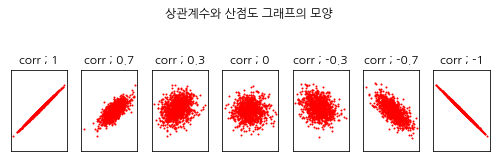

In [31]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0,0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms = 1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'corr ; {r}')
    
plt.suptitle('상관계수와 산점도 그래프의 모양', y = 1.1)
plt.tight_layout()
plt.show()

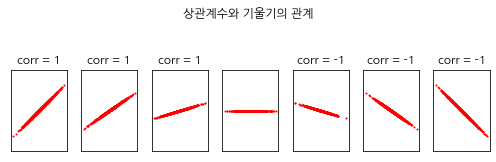

In [36]:
# 랜덤 요소 제거 
np.random.seed(1)

# 기울기 설정
slops = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]

# 그래프 설정
plt.figure(figsize = (len(slops), 2))
for i,s in enumerate(slops):
    # 서브플롯 배경 그리기
    plt.subplot(1, len(slops), i + 1)
    # 다변수 표준정규분포
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 1000).T
    # 기울기 변경
    
    y2 = s * y
    # 데이터 플롯 그리기
    plt.plot(x, y2, 'ro', ms = 1)
    # y값과 x값의 범위를 맞춰준다.
    plt.axis('equal')
    # 특정된 x나 y값을 표현하는건데 지금은 아무것도 표현하지 않도록 설정
    # 만약 아무것도 안주면, 자동으로 생성하기 때문에 []인자 전달
    plt.xticks([])
    plt.yticks([])
    if s > 0: # 방향이 어떻게 되느냐에 따라서 따라가게 된다.
        # 플롯의 제목
        plt.title('corr = 1')
    elif s < 0:
        plt.title('corr = -1')
# 플롯의 대제목
plt.suptitle('상관계수와 기울기의 관계', y = 1.1)
# 축의 글자가 겹치지 않도록 layout설정
plt.tight_layout()
# 그래프 show
plt.show()

* 기울기의 값에 따라 correlation의 변화는 없다.

## 상관관계 유의점(1)

C:\Users\user\AppData\Local\Temp\ipykernel_14772\659634494.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


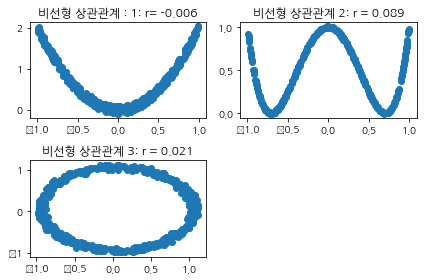

In [40]:
n = 500
np.random.seed(2)
plt.subplot(221)
x1 = np.random.uniform(-1, 1, n) # x의 범위를 -1에서 1로 잡는다.
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0] # x1과 y1의 피어슨 상관계수를 본다.
plt.title(f'비선형 상관관계 : 1: r= {r1.round(3)}')

plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4 * (x2**2 - 0.5)**2 + 0.1 * np.random.uniform(-0.1, 0.1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(f'비선형 상관관계 2: r = {r2.round(3)}')

plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(f'비선형 상관관계 3: r = {r3.round(3)}')
plt.tight_layout()
plt.show()

* 비선형적인 상관관계를 도출하지는 못한다.

### 데이터 분포에 따른 유의점(2)

In [43]:
data = sm.datasets.get_rdataset('anscombe')

In [47]:
df = data.data
df[['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']]

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


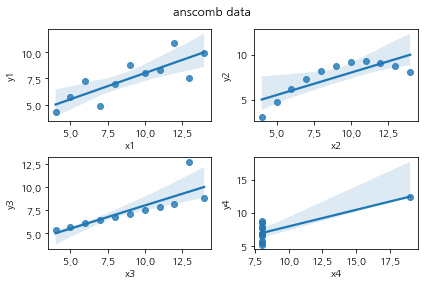

In [50]:
plt.subplot(221)
sns.regplot(x = 'x1', y = 'y1', data=df)
plt.subplot(222)
sns.regplot(x = 'x2', y = 'y2', data=df)
plt.subplot(223)
sns.regplot(x = 'x3', y = 'y3', data=df)
plt.subplot(224)
sns.regplot(x = 'x4', y = 'y4', data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('anscomb data')
plt.show()

* 4번째 그래프와 같은 경우는 이상치 때문에 상관계수가 높게 나올 수 있다.

In [52]:
for i in range(1,5):
  print(f'x{i}, y{i} 의 상관계수', sp.stats.pearsonr(df[f'x{i}'], df[f'y{i}'])[0])

x1, y1 의 상관계수 0.8164205163448399
x2, y2 의 상관계수 0.8162365060002428
x3, y3 의 상관계수 0.8162867394895983
x4, y4 의 상관계수 0.816521436888503


* 데이터의 상관관계만 보고 데이터를 판단하게 되면 안된다는 것을 바로 위의 4가지 그림을 통해 알 수 있다.

# END